# Mixture models: synthetic vs analytic views

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pomegranate import *

In [78]:
n = 20_000

## Synthetic mixture model 

In [71]:
# Model for height data in inches
# https://tasks.illustrativemathematics.org/content-standards/HSS/ID/A/4/tasks/1020
men = NormalDistribution(70.0, 3.0)
women = NormalDistribution(64.5, 2.5)
model = GeneralMixtureModel([men, women], [0.5, 0.5])

In [90]:
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                70.0,
                3.0
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                64.5,
                2.5
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.5,
        0.5
    ]
}

In [79]:
heights = model.sample(n)

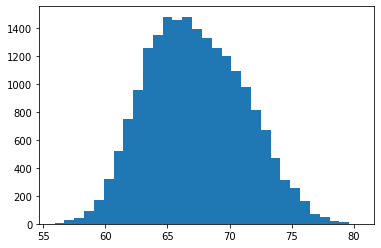

In [80]:
plt.hist(heights, bins=31)
plt.show()

## Analytic mixture model 

In [121]:
# Now fit a mixture model to the sample.
# We're going to fit a "wrong" model on purpose.
alt_model = GeneralMixtureModel.from_samples(
    GammaDistribution,
    n_components=2,
    X=np.asarray([heights]).T.copy())

In [122]:
alt_model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "GammaDistribution",
            "parameters" : [
                687.0599495086699,
                10.72155202073887
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "GammaDistribution",
            "parameters" : [
                455.06886100657505,
                6.564277878275685
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.3931704386455496,
        0.6068295613544503
    ]
}

In [127]:
alt_heights = alt_model.sample(n)

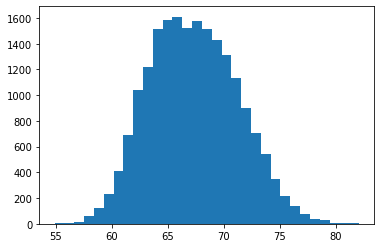

In [128]:
plt.hist(alt_heights, bins=31)
plt.show()

## Comparison

In [129]:
pd.DataFrame(heights).describe()

,0
count,20000.000000
mean,67.263688
std,3.912171
min,55.918017
25%,64.339951
50%,67.034671
75%,70.097367
max,80.429128


In [130]:
pd.DataFrame(alt_heights).describe()

,0
count,20000.000000
mean,67.310975
std,3.912698
min,54.916996
25%,64.386705
50%,67.152005
75%,70.084387
max,82.045749
